In [2]:
# import all required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data

data = pd.read_csv(r'C:\Users\HP\Desktop\Python DSA\assignments\StudentsPerformance.csv')

In [4]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
data.shape

(1000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test.

In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

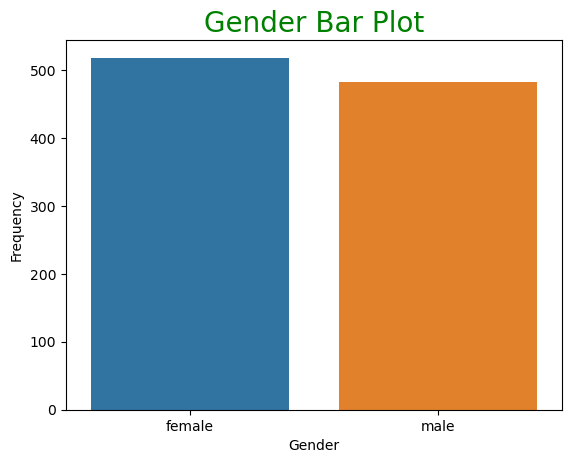

In [10]:
sns.countplot(data,x='gender')
plt.title('Gender Bar Plot',size=20,color='g')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

There are 518 females and 482 males are participated in the test

# 2. What do you think about the students' parental level of education?

In [11]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [12]:
data1 = data.groupby(['gender','parental level of education'])[['writing score','reading score','math score']].mean()
data1

writing score  reading score  math score
gender parental level of education                                          
female associate's degree               74.000000      74.120690   65.250000
       bachelor's degree                78.380952      77.285714   68.158730
       high school                      66.691489      68.202128   58.840426
       master's degree                  77.638889      76.805556   66.500000
       some college                     74.050847      73.550847   65.186441
       some high school                 68.285714      69.010989   58.780220
male   associate's degree               65.688679      67.622642   70.962264
       bachelor's degree                67.654545      68.090909   70.581818
       high school                      58.450980      61.284314   64.568627
       master's degree                  72.608696      74.608696   76.130435
       some college                     63.555556      65.212963   69.250000
       some high school                 61.375000      64.431818   67.636364

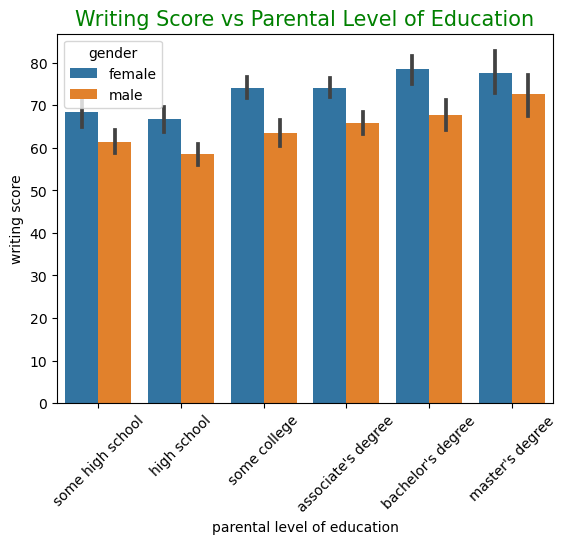

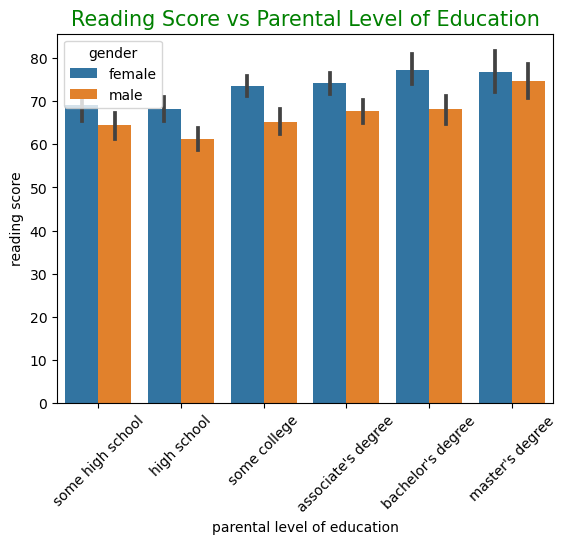

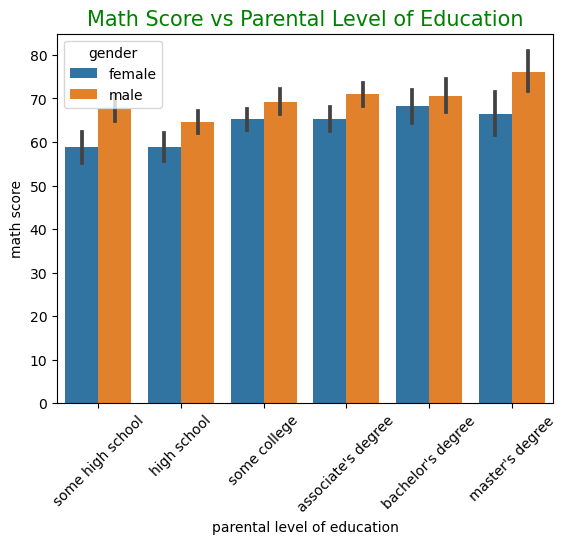

In [13]:
sns.barplot(x='parental level of education', y='writing score', data=data, hue='gender' )
plt.title('Writing Score vs Parental Level of Education',size=15,color='g')
plt.xticks(rotation=45)
plt.show()


sns.barplot(x='parental level of education', y='reading score', data=data,hue='gender' )
plt.title('Reading Score vs Parental Level of Education',size=15,color='g')
plt.xticks(rotation=45)
plt.show()


sns.barplot(x='parental level of education', y='math score', data=data,hue='gender' )
plt.title('Math Score vs Parental Level of Education',size=15,color='g')
plt.xticks(rotation=45)
plt.show()

Parental level of education is high for some college but comparing it with mean of writing score,reading score and math score then parental level of education is higher for males in master's degree and females in bachelor's degree 

# 3. Who scores the most on average for math, reading and writing based on
        ● Gender
        ● Test preparation course

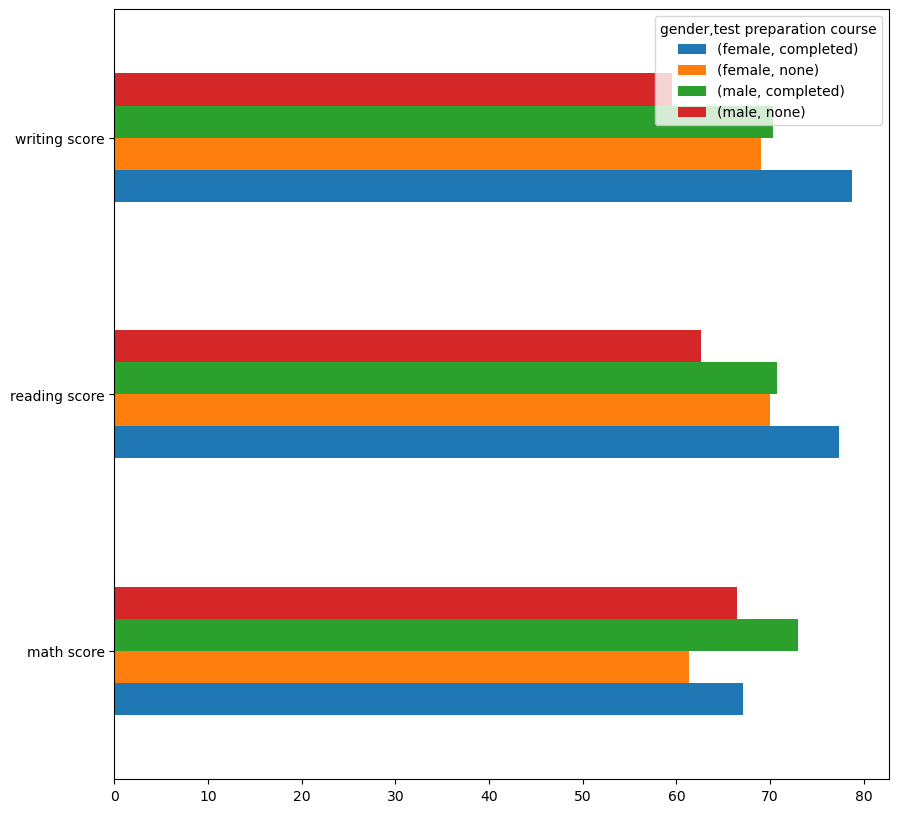

In [14]:
mean = data.groupby(['gender','test preparation course'])[['math score','reading score','writing score']].mean().T.plot(kind='barh', figsize=(10,10))

According to the gender and test preparation course:

Females those who have completed the test preparation course have highest score in writing and reading test and in math test the highest score got for males who have completed the test preparation course.




# 4. What do you think about the scoring variation for math, reading and writing based on
     ● Gender
     ● Test preparation course

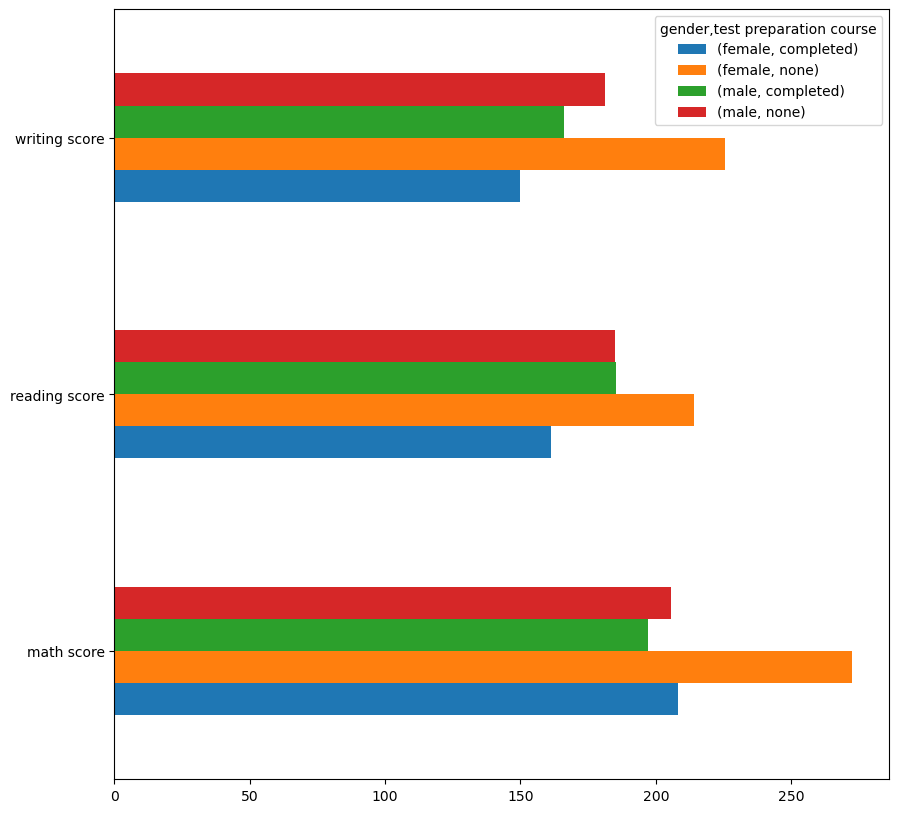

In [15]:
var = data.groupby(['gender','test preparation course'])[['math score','reading score','writing score']].var().T.plot(kind='barh', figsize=(10,10))

In writing,reading and math scores those who were completed the test preparation course have less variation compared to others.


# 

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [16]:
# calculate 75th percentile of the math score using quantile to find the top 25% of students based on their math score.

marks = data['math score'].quantile(0.75)
top_25_students = data[data['math score'] >= marks]

top_25_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
